# Wikipedia Notable Life Expectancies
# [Notebook 10: Data Pre-processing ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_preproc_2022_10_06.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_train.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 26 columns.


,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
0,", 73, British Anglican prelate, Bishop of Tonbridge.",https://en.wikipedia.org/wiki/David_Bartleet,4,2002,NaN,73.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,1,0,0,0,0,0,0,0,1,5329.000,0.250,64,Europe,No Prior Region,spiritual
1,", 90, American radiologist and university professor.",https://en.wikipedia.org/wiki/Eugene_Saenger,3,2007,NaN,90.000,NaN,United States of America,NaN,1,0,0,1,0,0,0,0,0,0,2,8100.000,0.333,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
77622,", 74, Canadian journalist and author.",https://en.wikipedia.org/wiki/Charles_Lynch_(journalist),7,1994,NaN,74.000,NaN,Canada,NaN,0,0,0,0,0,1,0,0,0,0,1,5476.000,0.143,0,North America,No Prior Region,arts
77623,", 92, English cricketer and squash player.",https://en.wikipedia.org/wiki/Edward_Harrison_(cricketer),5,2002,NaN,92.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,0,0,0,1,0,0,0,1,8464.000,0.200,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
63968,", 70, Icelandic footballer .",https://en.wikipedia.org/wiki/J%C3%B3hannes_E%C3%B0valdsson,7,2021,"Celtic, Motherwell, national team",70.000,NaN,Iceland,NaN,0,0,0,0,0,0,1,0,0,0,1,4900.000,0.143,729,Europe,No Prior Region,sports
73010,", 71, Saint Lucian barrister and jurist, High Court judge .",https://en.wikipedia.org/wiki/Suzie_d%27Auvergne,6,2014,1990 2004,71.000,NaN,Saint Lucia,NaN,0,0,0,0,0,0,0,0,1,0,1,5041.000,0.167,400,Mid-Cent America/Caribbean,No Prior Region,politics_govt_law
46567,", 82, Italian actress and fashion model, cancer.",https://en.wikipedia.org/wiki/Elsa_Martinelli,11,2017,", ,",82.000,cancer,Italy,NaN,0,0,0,0,0,1,0,0,0,0,1,6724.000,0.091,529,Europe,No Prior Region,arts
23411,", 89, American cartoonist .",https://en.wikipedia.org/wiki/Mell_Lazarus,15,2016,",",89.000,NaN,United States of America,NaN,0,0,0,0,0,1,0,0,0,0,1,7921.000,0.067,484,North America,No Prior Region,arts
24100,", 89, British musician, prostate cancer.",https://en.wikipedia.org/wiki/Tito_Burns,12,2010,NaN,89.000,prostate cancer,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,0,0,1,0,0,0,0,1,7921.000,0.083,256,Europe,No Prior Region,arts


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   info                       77624 non-null  object 
 1   link                       77624 non-null  object 
 2   num_references             77624 non-null  int64  
 3   year                       77624 non-null  int64  
 4   info_parenth               26860 non-null  object 
 5   age                        77624 non-null  float64
 6   cause_of_death             26344 non-null  object 
 7   place_1                    77509 non-null  object 
 8   place_2                    4309 non-null   object 
 9   sciences                   77624 non-null  int64  
 10  social                     77624 non-null  int64  
 11  spiritual                  77624 non-null  int64  
 12  academia_humanities        77624 non-null  int64  
 13  business_farming           77624 non-null  int

<IPython.core.display.Javascript object>

In [6]:
# Checking sum of null values by column
df.isnull().sum()

info                             0
link                             0
num_references                   0
year                             0
info_parenth                 50764
age                              0
cause_of_death               51280
place_1                        115
place_2                      73315
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
num_categories                   0
age_sqrd                         0
recip_num_references             0
years_sqrd                       0
region                         115
prior_region                     0
known_for                        0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
df.columns

Index(['info', 'link', 'num_references', 'year', 'info_parenth', 'age',
       'cause_of_death', 'place_1', 'place_2', 'sciences', 'social',
       'spiritual', 'academia_humanities', 'business_farming', 'arts',
       'sports', 'law_enf_military_operator', 'politics_govt_law', 'crime',
       'num_categories', 'age_sqrd', 'recip_num_references', 'years_sqrd',
       'region', 'prior_region', 'known_for'],
      dtype='object')

<IPython.core.display.Javascript object>

## Data Pre-processing
- There are 77,624 rows and 26 columns in the training set.
- We will need to typecast our categorical columns again.
- At the outset, we can drop the following columns:
    - `cause_of_death`
    - `place_1`
    - `place_2`
- Most likely, we will not be using the individual `known for` category columns again, but we will retain them, just in case.
- After outlier detection is complete, we can drop `info`, `info_parenth`, and `link` columns.
- The missing values for `region` will need treatment.

#### Dropping Unnecessary Columns

In [8]:
# Dropping unnecessary columns
cols_to_drop = [
    "cause_of_death",
    "place_1",
    "place_2",
]
df.drop(cols_to_drop, axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77624 rows and 23 columns.


<IPython.core.display.Javascript object>

#### Typecasting Categorical Columns

In [9]:
# Typecasting categorical columns
cols_to_cast = ["region", "prior_region", "known_for"]
df[cols_to_cast] = df[cols_to_cast].astype("category")

<IPython.core.display.Javascript object>

#### Confirming Updated Columns

In [10]:
# Recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       77624 non-null  object  
 1   link                       77624 non-null  object  
 2   num_references             77624 non-null  int64   
 3   year                       77624 non-null  int64   
 4   info_parenth               26860 non-null  object  
 5   age                        77624 non-null  float64 
 6   sciences                   77624 non-null  int64   
 7   social                     77624 non-null  int64   
 8   spiritual                  77624 non-null  int64   
 9   academia_humanities        77624 non-null  int64   
 10  business_farming           77624 non-null  int64   
 11  arts                       77624 non-null  int64   
 12  sports                     77624 non-null  int64   
 13  law_enf_military_operator  7762

<IPython.core.display.Javascript object>

## Outlier Detection and Treatment

#### Function to View Outliers for Each Predictor Column

In [11]:
# Define a function that returns new dataframe of count and percentage of outliers of input dataframe columns
def outside_IQRends_pls1pt5(dataframe):
    """
    Takes input numeric dataframe and returns a dataframe of the column count 
    and percentage of values that are outliers, defined by 
    x < (Q1 - 1.5*IQR) ∪ (Q3 + 1.5*IQR) > x, where x is the value of the outlier.

    """
    count_lst = []
    perc_lst = []

    for column in dataframe:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        count = len(
            dataframe[
                (dataframe[column] < lower_whisker)
                | (dataframe[column] > upper_whisker)
            ]
        )
        percentage = round(count / len(dataframe[column]) * 100, 2)

        count_lst.append(count)
        perc_lst.append(percentage)

    outlier_dict = {"outlier_count": count_lst, "percentage_outliers": perc_lst}

    return pd.DataFrame(data=outlier_dict, index=dataframe.columns).sort_values(
        by="outlier_count", ascending=False
    )

<IPython.core.display.Javascript object>

#### Visualization of outliers

In [12]:
df.columns

Index(['info', 'link', 'num_references', 'year', 'info_parenth', 'age',
       'sciences', 'social', 'spiritual', 'academia_humanities',
       'business_farming', 'arts', 'sports', 'law_enf_military_operator',
       'politics_govt_law', 'crime', 'num_categories', 'age_sqrd',
       'recip_num_references', 'years_sqrd', 'region', 'prior_region',
       'known_for'],
      dtype='object')

<IPython.core.display.Javascript object>

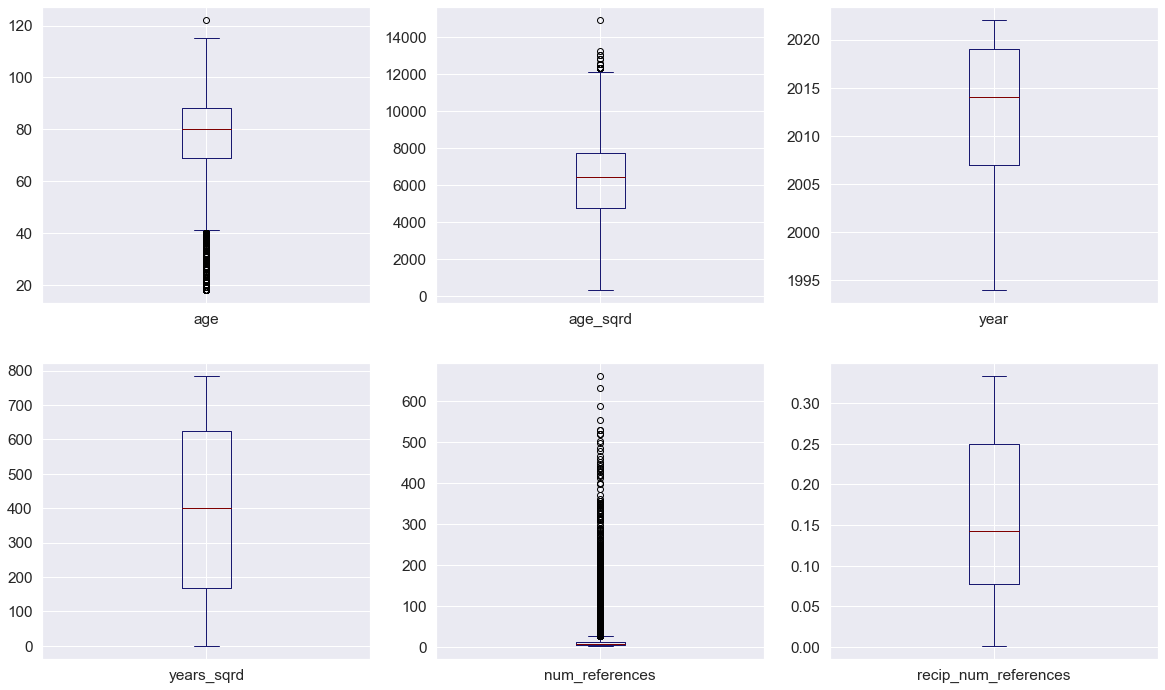

,outlier_count,percentage_outliers
num_references,6618,8.530
age,3058,3.940
age_sqrd,20,0.030
year,0,0.000
years_sqrd,0,0.000
recip_num_references,0,0.000


<IPython.core.display.Javascript object>

In [13]:
# Boxplots of numerical features to view outliers
columns = [
    "age",
    "age_sqrd",
    "year",
    "years_sqrd",
    "num_references",
    "recip_num_references",
]
df[columns].plot.box(subplots=True, figsize=(20, 12), layout=(2, 3))
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[columns])

#### Observations:
- The target, `age`, has at least one upper-end outlier and numerous lower-end outliers. while its squared transformation, `age_sqrd` has only upper-end outliers.
- In general, we would not treat the target's outliers.  However, we will examine the most extreme upper value that does not follow the trend in the data.

#### Examining the Most Extreme Value for Target `age`

In [14]:
# Checking uppermost outlier for age
df[(df["age"] > 120)]

,info,link,num_references,year,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years_sqrd,region,prior_region,known_for
47162,", 122 .",https://en.wikipedia.org/wiki/Sudhakar_Chaturvedi,37,2020,"claimed, Indian Vedic scholar and courier Mahatma Gandhi",122.000,0,0,0,1,0,0,0,0,1,0,2,14884.000,0.027,676,Asia,No Prior Region,two


<IPython.core.display.Javascript object>

#### Observations:
- We will keep the upper-end outlier, whose age appears accurate and who was not noteworthy in life solely due to his age.
- With no indicated treatment, beyond previously performed feature transformations, we are finished examining the outliers.
- `info`, `info_parenth`, and `link` may now be dropped.

#### Dropping `info`, `info_parenth`, and `link`

In [15]:
# Dropping info, info_parenth, and link
cols_to_drop = ["info", "info_parenth", "link"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Re-check shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77624 rows and 20 columns.


<IPython.core.display.Javascript object>

#### Confirming Remaining Columns

In [16]:
# Checking remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   year                       77624 non-null  int64   
 2   age                        77624 non-null  float64 
 3   sciences                   77624 non-null  int64   
 4   social                     77624 non-null  int64   
 5   spiritual                  77624 non-null  int64   
 6   academia_humanities        77624 non-null  int64   
 7   business_farming           77624 non-null  int64   
 8   arts                       77624 non-null  int64   
 9   sports                     77624 non-null  int64   
 10  law_enf_military_operator  77624 non-null  int64   
 11  politics_govt_law          77624 non-null  int64   
 12  crime                      77624 non-null  int64   
 13  num_categories             7762

<IPython.core.display.Javascript object>

#### Observations:
- After briefly revisiting EDA, we will proceed to treat missing values.

## EDA Revisited

### Summary Statistics

#### Numerical Features

In [17]:
# Summary Statistics of Numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_references,77624.000,12.554,21.138,3.000,4.000,7.000,13.000,660.000
year,77624.000,2012.155,7.834,1994.000,2007.000,2014.000,2019.000,2022.000
age,77624.000,76.869,15.830,18.000,69.000,80.000,88.000,122.000
sciences,77624.000,0.090,0.286,0.000,0.000,0.000,0.000,1.000
social,77624.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
spiritual,77624.000,0.036,0.186,0.000,0.000,0.000,0.000,1.000
academia_humanities,77624.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000
business_farming,77624.000,0.037,0.189,0.000,0.000,0.000,0.000,1.000
arts,77624.000,0.410,0.492,0.000,0.000,0.000,1.000,1.000
sports,77624.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

#### Categorical Features

In [18]:
# Summary statistics of categorical features
df.describe(include="category").T

,count,unique,top,freq
region,77509,11,North America,32201
prior_region,77624,12,No Prior Region,73315
known_for,77624,12,arts,26060


<IPython.core.display.Javascript object>

#### Observations:
- Here, we are just having a quick check that the original and added features are what we expect them to be.
- After initial EDA, we have not done any additional treatment.
- Evertying is looking good, and we will glance at correlation, as well.

### Correlation

#### Pairplot of Numerical Features w.r.t. `known_for`

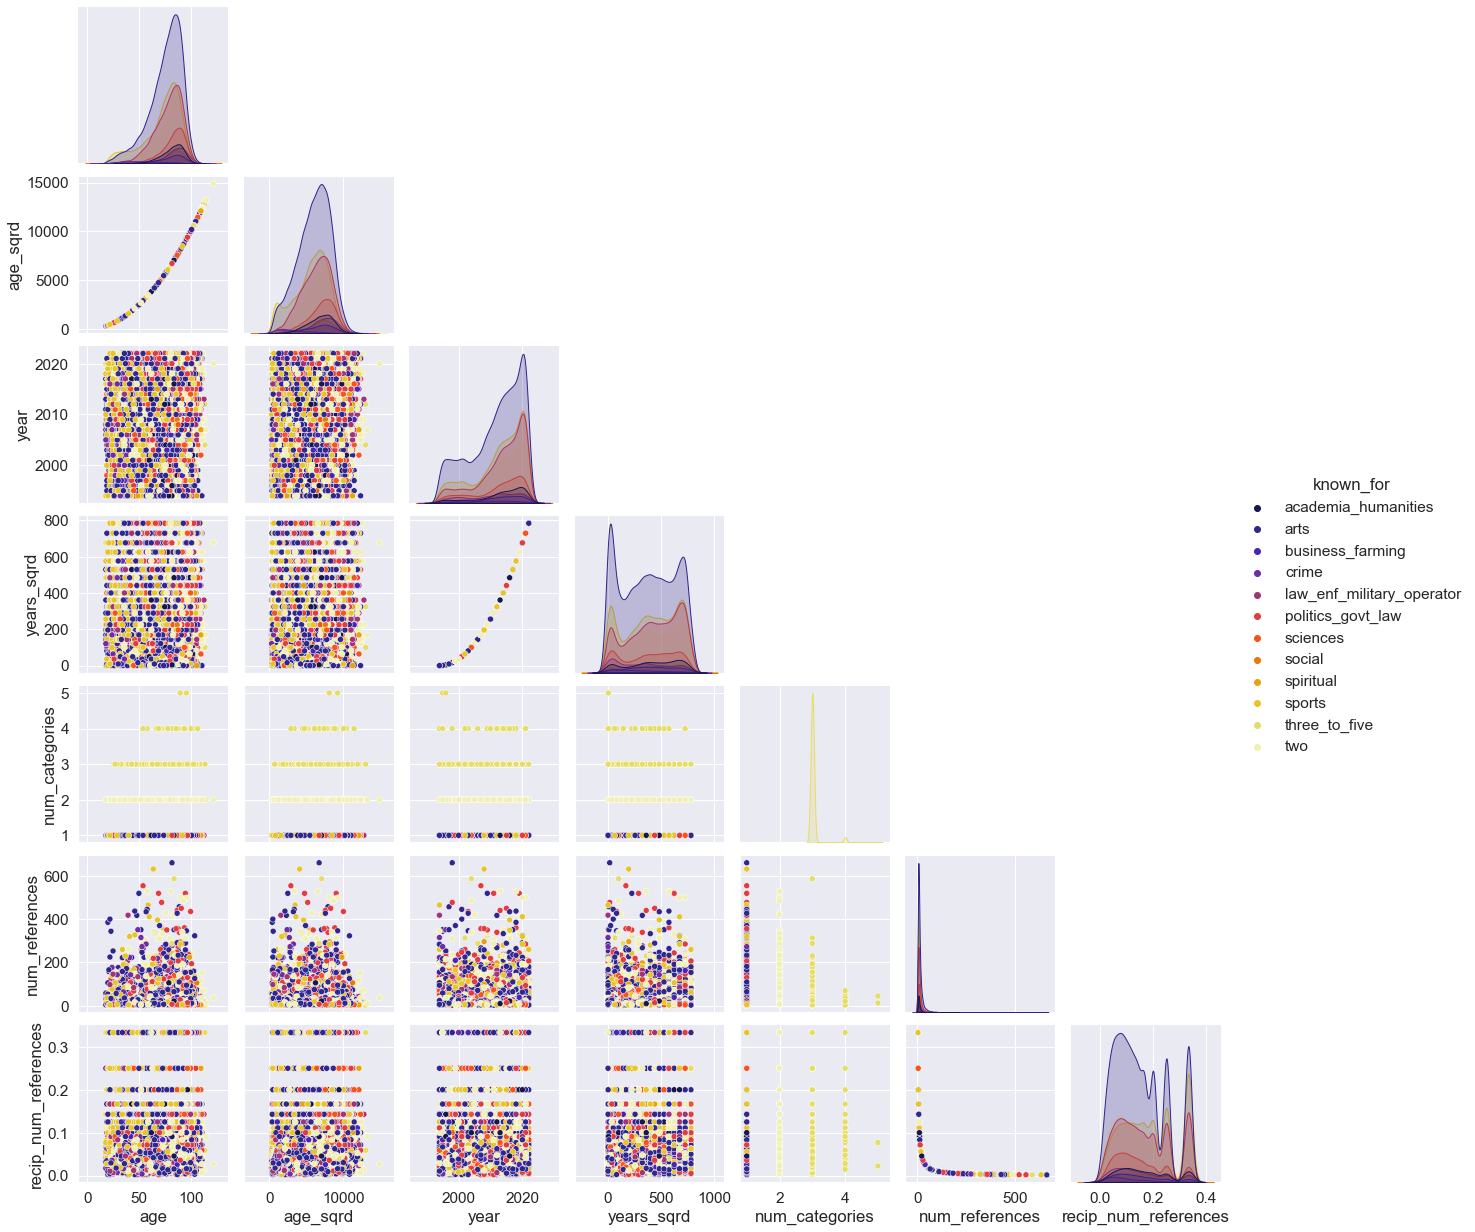

<IPython.core.display.Javascript object>

In [19]:
# Pairplot of numerical features
vars = [
    "age",
    "age_sqrd",
    "year",
    "years_sqrd",
    "num_categories",
    "num_references",
    "recip_num_references",
]
sns.pairplot(
    df, diag_kind="kde", corner=True, vars=vars, hue="known_for", palette="CMRmap"
)
plt.show()

#### Heatmap of Correlation of Numerical Features

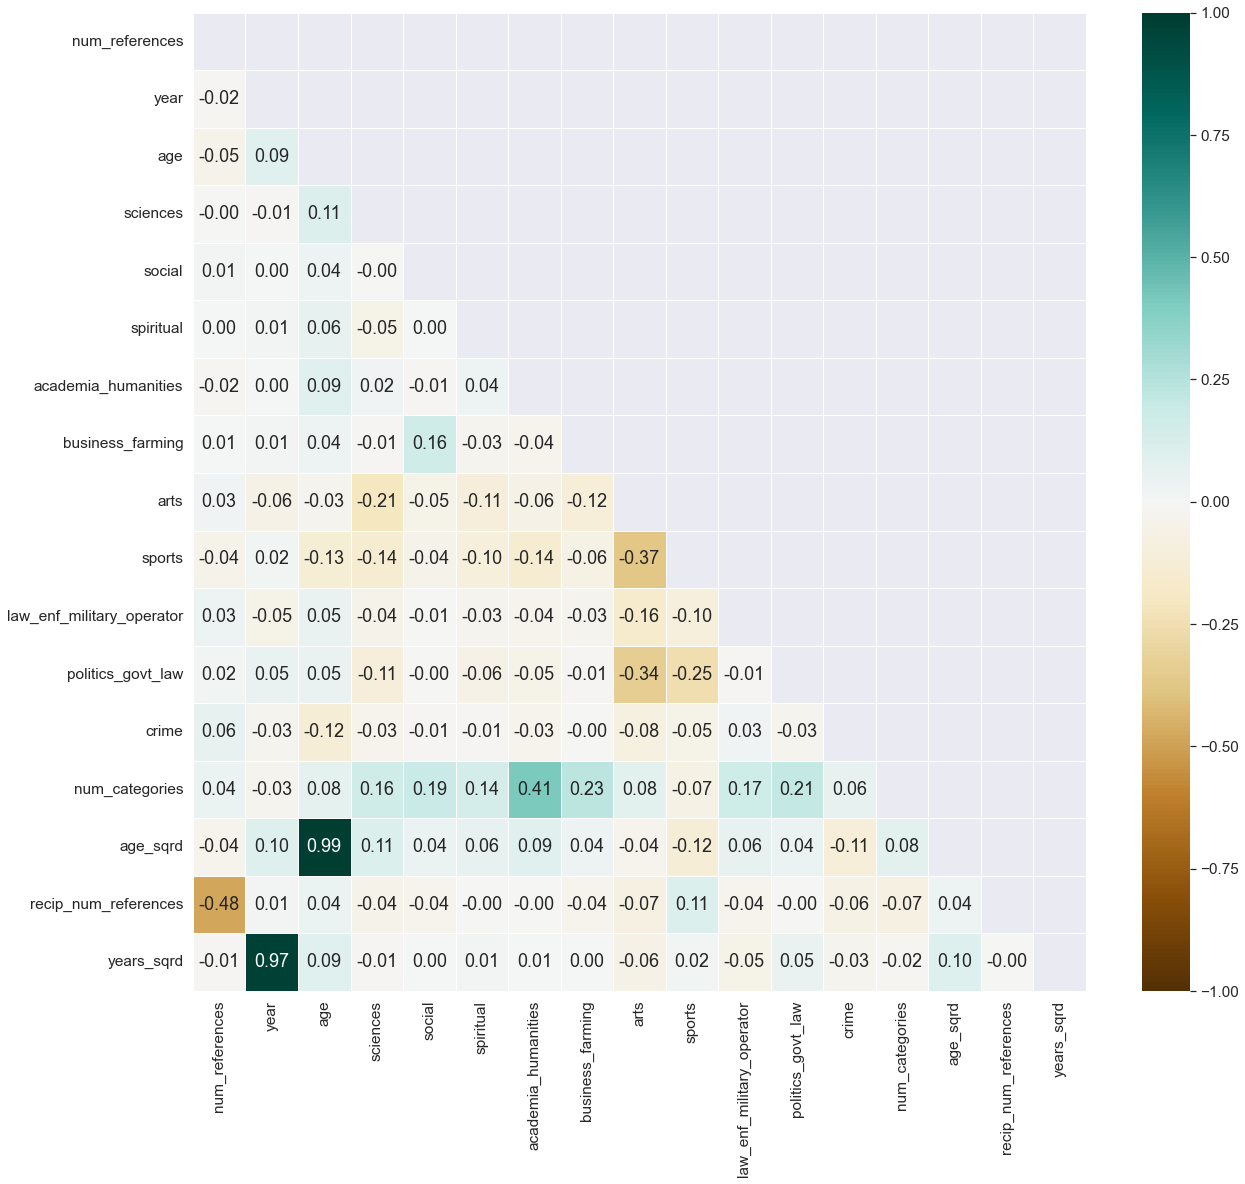

<IPython.core.display.Javascript object>

In [20]:
# Pairplot of numerical features
plt.figure(figsize=(20, 18))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    annot=True,
    fmt=(".2f"),
    annot_kws={"size": 18},
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    mask=mask,
    linewidth=1,
)
plt.show()

#### Observations:
- There is very little observable variation in the pairplot, which indicates we do not have any strong predictors.
- Likewise, there is essentially no correlation between the numerical features on the heatmap.
- We will move on to missing value treatment.

## Missing Values
There is only the one column, `region`, to treat.  However, we will proceed with the exercise of programmatically assessing missing values for any column.  

We will group entries by `known_for`, then impute missing `region` with the mode for the group.

### Imputation of Missing Values

#### Function to Return Columns with Missing Values and Their Missing Value Counts

In [21]:
# Define a function to return Series of columns of dataframe with null values and their null value counts
def null_count_4col(dataframe):
    """
    Takes input dataframe and returns Series of columns with missing values and their missing value counts
    """
    null_cols = dataframe.isnull().sum()[df.isnull().sum() > 0].index.to_list()
    if len(null_cols) > 0:
        return dataframe[null_cols].isnull().sum()
    else:
        print(
            f"There are {dataframe.isnull().sum().sum()} remaining missing values in the dataframe."
        )

<IPython.core.display.Javascript object>

#### Function to Make a List of Column Names with Missing Values

In [22]:
# Define a function to create list of columns with missing values
def null_cols(dataframe):
    """
    Takes input dataframe and returns list of column names that contain null values
    """
    null_cols = dataframe.isnull().sum()[dataframe.isnull().sum() > 0].index.to_list()
    return null_cols

<IPython.core.display.Javascript object>

#### Function to Impute Missing Values in a Dataframe by the Mode of Rows Grouped by Other Selected Columns

In [23]:
# Define a function to impute missing values in a dataframe by the median
# of rows grouped by other selected columns
def impute_mode(dataframe, groupby_lst, null_cols_lst):
    """
    A function to impute missing values in a dataframe by their column median
    of rows grouped by other selected columns
    
    dataframe: dataframe
    groupby_lst: columns to group by for calculating median for imputation
    null_cols_list: columns to have missing values treated with imputation
    """
    dataframe[null_cols_lst] = dataframe.groupby(groupby_lst)[null_cols_lst].transform(
        lambda x: x.fillna(x.mode().iloc[0])
    )
    return dataframe

<IPython.core.display.Javascript object>

#### Missing Values Before Treatment

In [24]:
# display missing values prior to imputation
null_count_4col(df)

region    115
dtype: int64

<IPython.core.display.Javascript object>

#### Imputing Missing Values

In [25]:
# Using above functions to impute missing values using mode of rows grouped by known_for
groupby_lst = ["known_for"]
null_cols_lst = null_cols(df)

impute_mode(df, groupby_lst, null_cols_lst)

null_count_4col(df)

There are 0 remaining missing values in the dataframe.


<IPython.core.display.Javascript object>

#### Observations:
- We have treated the missing values.
- The additional functions were included here to illustrate an approach for a dataset with more columns with missing values.
- Missing mean or median values could be handled similarly and we will include the above treatment for the `test` set, but using the modes from `train`.
- Let us check our columns once more before exporting the dataset.

#### Confirming Final Columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   year                       77624 non-null  int64   
 2   age                        77624 non-null  float64 
 3   sciences                   77624 non-null  int64   
 4   social                     77624 non-null  int64   
 5   spiritual                  77624 non-null  int64   
 6   academia_humanities        77624 non-null  int64   
 7   business_farming           77624 non-null  int64   
 8   arts                       77624 non-null  int64   
 9   sports                     77624 non-null  int64   
 10  law_enf_military_operator  77624 non-null  int64   
 11  politics_govt_law          77624 non-null  int64   
 12  crime                      77624 non-null  int64   
 13  num_categories             7762

<IPython.core.display.Javascript object>

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Saving Dataset to [wp_life_expect_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv)

In [27]:
# Saving dataset to csv
df.to_csv("wp_life_expect_preproc.csv", index=False)

<IPython.core.display.Javascript object>

In [28]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

# [Proceed to Modeling ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_modeling_thanak_2022_10_9.ipynb)